In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
data=pd.read_csv('Customer_Churn_Prediction/data/WA_Fn-UseC_-Telco-Customer-Churn.csv')



### Churn Data Description

| **Column Name**      | **Description**                                                                                           |
|---------------------|-----------------------------------------------------------------------------------------------------------|
| **CustomerID**      | A unique ID that identifies each customer.                                                               |
| **Count**           | A value used in reporting/dashboarding to sum up the number of customers in a filtered set.              |
| **Country**         | The country of the customer’s primary residence.                                                         |
| **State**           | The state of the customer’s primary residence.                                                           |
| **City**            | The city of the customer’s primary residence.                                                            |
| **Zip Code**        | The zip code of the customer’s primary residence.                                                        |
| **Lat Long**        | The combined latitude and longitude of the customer’s primary residence.                                 |
| **Latitude**        | The latitude of the customer’s primary residence.                                                        |
| **Longitude**       | The longitude of the customer’s primary residence.                                                       |
| **Gender**          | The customer’s gender: Male, Female.                                                                     |
| **Senior Citizen**  | Indicates if the customer is 65 or older: Yes, No.                                                      |
| **Partner**         | Indicates if the customer has a partner: Yes, No.                                                        |
| **Dependents**      | Indicates if the customer lives with any dependents: Yes, No.                                           |
| **Tenure Months**   | Total amount of months that the customer has been with the company by the end of the specified quarter.  |
| **Phone Service**   | Indicates if the customer subscribes to home phone service: Yes, No.                                    |
| **Multiple Lines**  | Indicates if the customer subscribes to multiple telephone lines: Yes, No.                               |
| **Internet Service**| Indicates if the customer subscribes to Internet service: No, DSL, Fiber Optic, Cable.                   |
| **Online Security** | Indicates if the customer subscribes to online security service: Yes, No.                                |
| **Online Backup**   | Indicates if the customer subscribes to online backup service: Yes, No.                                  |
| **Device Protection**| Indicates if the customer subscribes to device protection plan: Yes, No.                                 |
| **Tech Support**    | Indicates if the customer subscribes to technical support plan: Yes, No.                                 |
| **Streaming TV**    | Indicates if the customer streams TV programming: Yes, No.                                              |
| **Streaming Movies**| Indicates if the customer streams movies: Yes, No.                                                       |
| **Contract**        | Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.                     |
| **Paperless Billing**| Indicates if the customer has chosen paperless billing: Yes, No.                                        |
| **Payment Method**  | Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check.                  |
| **Monthly Charge**  | Customer’s current total monthly charge for all services.                                               |
| **Total Charges**   | Customer’s total charges calculated to the end of the specified quarter.                                |
| **Churn Label**     | Indicates if the customer left the company this quarter: Yes, No.                                       |


In [96]:
data.head() 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [97]:
# data info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [98]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [99]:
data.isnull().sum()  # Check for missing values


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<Axes: xlabel='Churn', ylabel='proportion'>

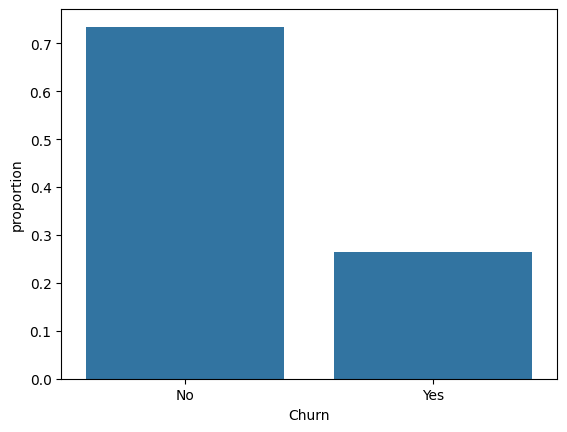

In [100]:
data['Churn'].value_counts(normalize=True)
sns.barplot(y='proportion',x='Churn',data=data['Churn'].value_counts(normalize=True).reset_index())


In [101]:
(data['Churn'].value_counts(normalize=True)*100).reset_index()


,Churn,proportion
0,No,73.463013
1,Yes,26.536987


In [102]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [103]:
tenure_year=data["tenure"]/12

In [104]:
tenure_year

0       0.083333
1       2.833333
2       0.166667
3       3.750000
4       0.166667
          ...   
7038    2.000000
7039    6.000000
7040    0.916667
7041    0.333333
7042    5.500000
Name: tenure, Length: 7043, dtype: float64

In [105]:
data

data[data['TotalCharges'].str.contains("\d+")]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [106]:
tenure_year=data['tenure']/12

In [107]:
data["tenure_year"]=tenure_year.apply(lambda x: f"{x:.2f}")

In [108]:
data.drop(columns=['tenure'],inplace=True)

In [109]:
data.rename(columns={
    'tenure_year':'tenure'
},inplace=True)

In [110]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0.08
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,2.83
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0.17
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,3.75
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No,2.00
7039,2234-XADUH,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,6.00
7040,4801-JZAZL,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0.92
7041,8361-LTMKD,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes,0.33


In [111]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0.08
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,2.83
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0.17
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,3.75
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No,2.00
7039,2234-XADUH,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,6.00
7040,4801-JZAZL,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0.92
7041,8361-LTMKD,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes,0.33


In [112]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'tenure'],
      dtype='object')

In [113]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0.08
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,2.83
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0.17
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,3.75
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No,2.00
7039,2234-XADUH,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,6.00
7040,4801-JZAZL,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0.92
7041,8361-LTMKD,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes,0.33


In [114]:
#Explorative Data Anaylsis

In [115]:
# Check the shape and data types
print(data.shape)  # Number of rows and columns
print(data.info())  # Data types and missing values



(7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null

In [116]:
# Check basic statistics for numerical columns
print(data.describe())  # Summary statistics for numerical features


       SeniorCitizen  MonthlyCharges
count    7043.000000     7043.000000
mean        0.162147       64.761692
std         0.368612       30.090047
min         0.000000       18.250000
25%         0.000000       35.500000
50%         0.000000       70.350000
75%         0.000000       89.850000
max         1.000000      118.750000


In [117]:
data.iloc[data[~data['TotalCharges'].str.contains("\d+")].index,-3]="0"


In [118]:
data[~data['TotalCharges'].str.contains("\d+")]

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure


In [119]:
data.TotalCharges=data.TotalCharges.astype('float')

In [120]:
data.describe()

,SeniorCitizen,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,64.761692,2279.734304
std,0.368612,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,0.000000,35.500000,398.550000
50%,0.000000,70.350000,1394.550000
75%,0.000000,89.850000,3786.600000
max,1.000000,118.750000,8684.800000


Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


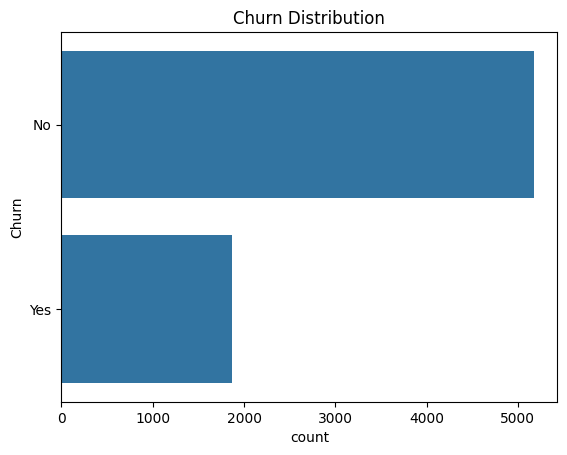

In [121]:
# Count of churn and non-churn customers
print(data['Churn'].value_counts(normalize=True))

# Visualize the target variable distribution
sns.countplot(data['Churn'])
plt.title("Churn Distribution")
plt.show()


#There is an imbalance of yes in churn 

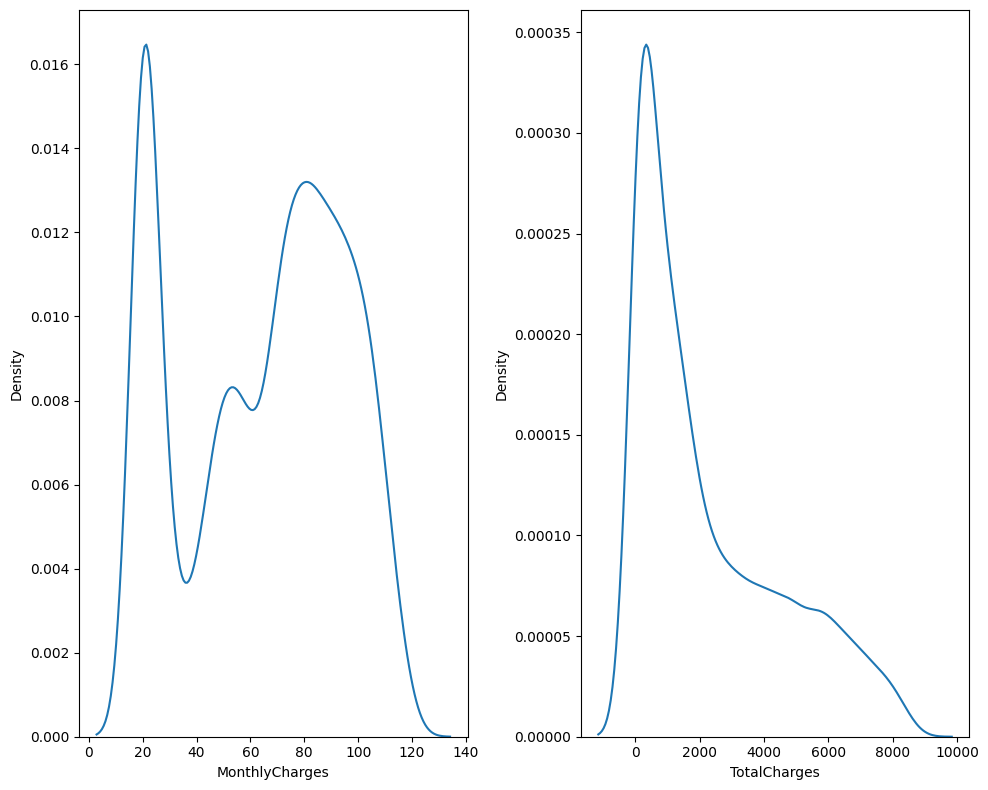

<Figure size 10000x10000 with 0 Axes>

In [122]:
# Histograms of numerical features

fig,ax1=plt.subplots(1,2,figsize=(10, 8))

sns.kdeplot(data=data['MonthlyCharges'],ax=ax1[0])
sns.kdeplot(data=data['TotalCharges'],ax=ax1[1])
plt.tight_layout()

plt.figure(figsize=(100, 100))

plt.show()



Monthly Charges are up and down curves, whereas Total charges are right skewed

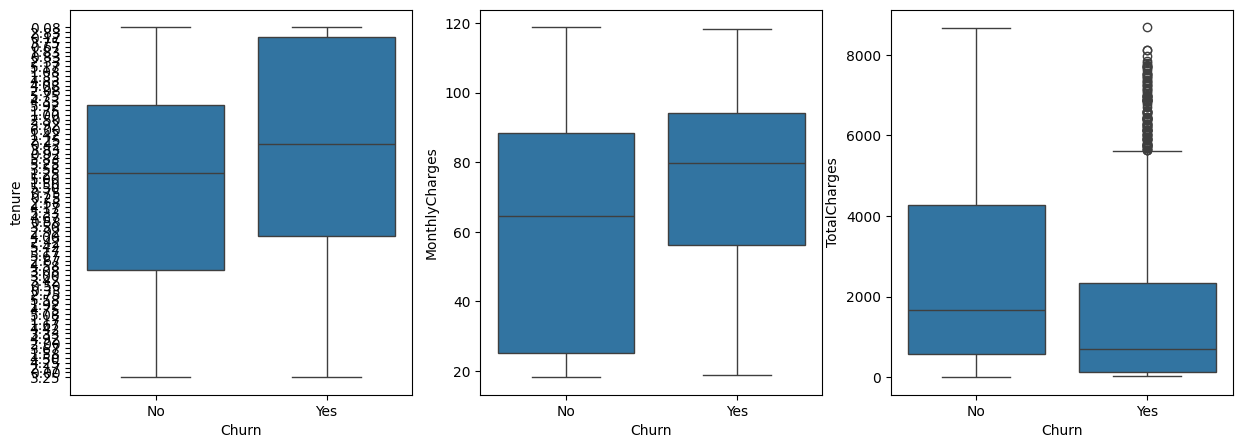

In [123]:
# Boxplots for tenure, MonthlyCharges, and TotalCharges vs. churn
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.boxplot(x='Churn', y='tenure', data=data, ax=axes[0])
sns.boxplot(x='Churn', y='MonthlyCharges', data=data, ax=axes[1])
sns.boxplot(x='Churn', y='TotalCharges', data=data, ax=axes[2])
plt.show()


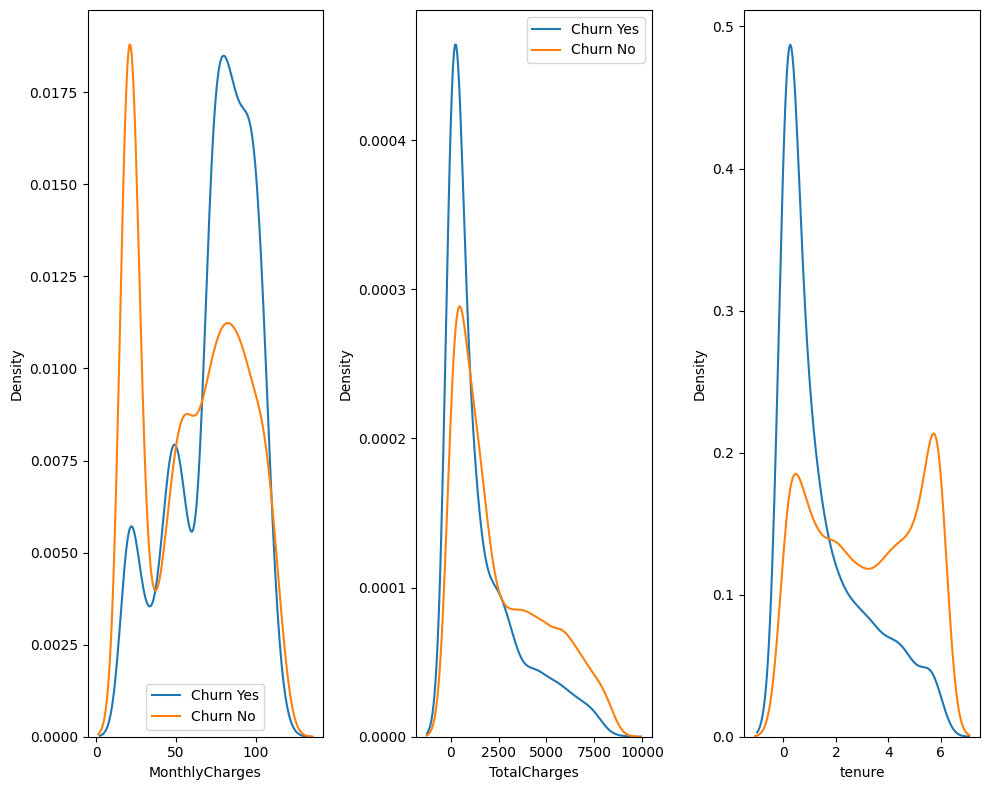

<Figure size 10000x10000 with 0 Axes>

In [124]:
# Histograms of numerical features

fig,ax1=plt.subplots(1,3,figsize=(10, 8))
sns.kdeplot(data=data[data['Churn']=='Yes']['tenure'].astype('float64'),ax=ax1[2])
sns.kdeplot(data=data[data['Churn']!='Yes']['tenure'].astype('float64'),ax=ax1[2])

sns.kdeplot(data=data[data['Churn']=='Yes']['MonthlyCharges'],ax=ax1[0])
sns.kdeplot(data=data[data['Churn']!='Yes']['MonthlyCharges'],ax=ax1[0])
sns.kdeplot(data=data[data['Churn']=='Yes']['TotalCharges'],ax=ax1[1])
sns.kdeplot(data=data[data['Churn']!='Yes']['TotalCharges'],ax=ax1[1])

ax1[0].legend(['Churn Yes','Churn No'])
ax1[1].legend(['Churn Yes','Churn No'])



plt.tight_layout()

plt.figure(figsize=(100, 100))

plt.show()


Tenures which are low and monthly charges which are high mostly likely to be churned in future

In [125]:
#  Churn vs. Categorical Features (Bar Plots)



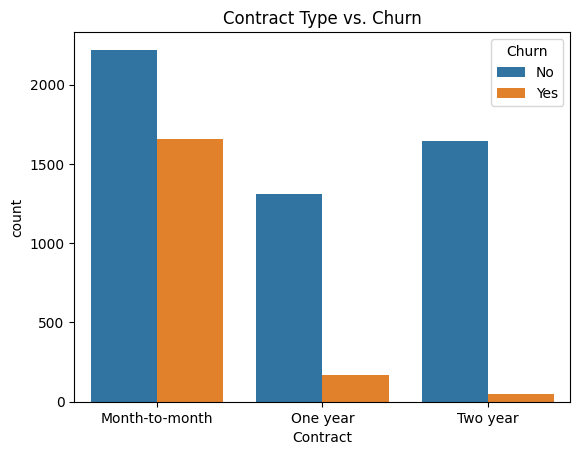

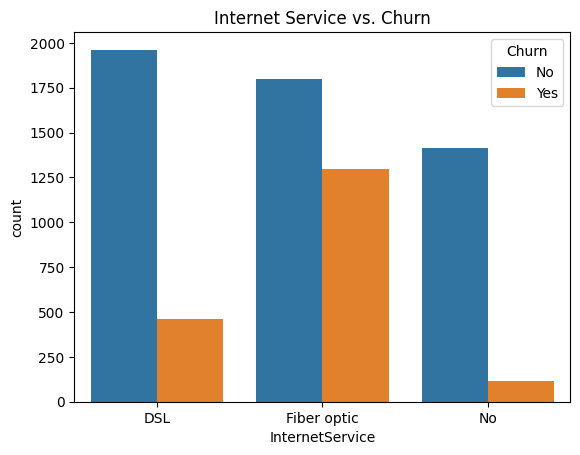

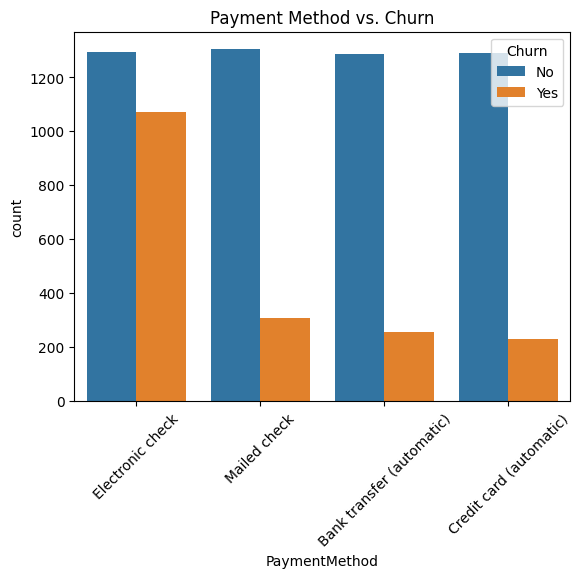

In [126]:
# Contract type vs. churn
sns.countplot(x='Contract', hue='Churn', data=data)
plt.title("Contract Type vs. Churn")
plt.show()

# InternetService type vs. churn
sns.countplot(x='InternetService', hue='Churn', data=data)
plt.title("Internet Service vs. Churn")
plt.show()

# Payment Method vs. churn
sns.countplot(x='PaymentMethod', hue='Churn', data=data)
plt.title("Payment Method vs. Churn")

plt.xticks(rotation=45)
plt.show()


By the categorical vs churn we can conlude:

1.The probability of month to month contracts, electric check payment methods,Fibre optic internet service as possibility of being chirned


"

In [127]:
# Churn rate by contract type
contract_churn_rate = data.groupby('Contract')['TotalCharges'].mean()
print(contract_churn_rate)

# Churn rate by internet service type
internet_churn_rate = data.groupby('InternetService')['TotalCharges'].mean()
print(internet_churn_rate)


Contract
Month-to-month    1369.254581
One year          3032.622878
Two year          3706.934336
Name: TotalCharges, dtype: float64
InternetService
DSL            2115.411338
Fiber optic    3205.304570
No              662.604784
Name: TotalCharges, dtype: float64


In [128]:
numerical_data=data[['MonthlyCharges','TotalCharges','Churn','tenure']]


In [129]:
numerical_data['Churn'].replace({'Yes':1,'No':0},inplace=True)

/var/folders/xt/7k3j27k50rz15s_srwv63h9nq8y8f4/T/ipykernel_39537/868901224.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  numerical_data['Churn'].replace({'Yes':1,'No':0},inplace=True)
/var/folders/xt/7k3j27k50rz15s_srwv63h9nq8y8f4/T/ipykernel_39537/868901224.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downca

<Axes: >

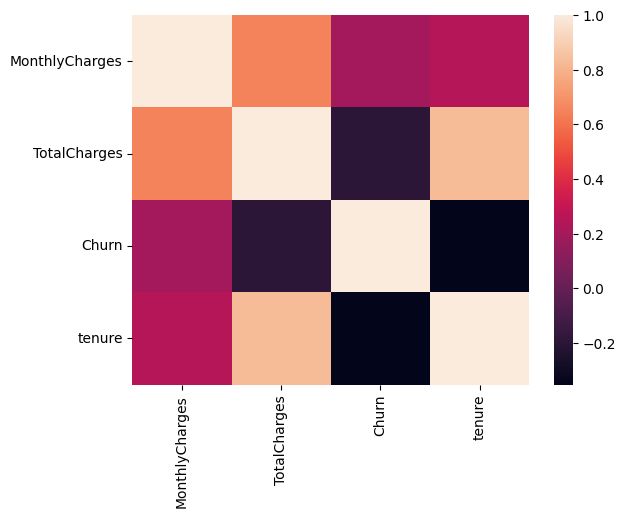

In [130]:
sns.heatmap(numerical_data.corr())

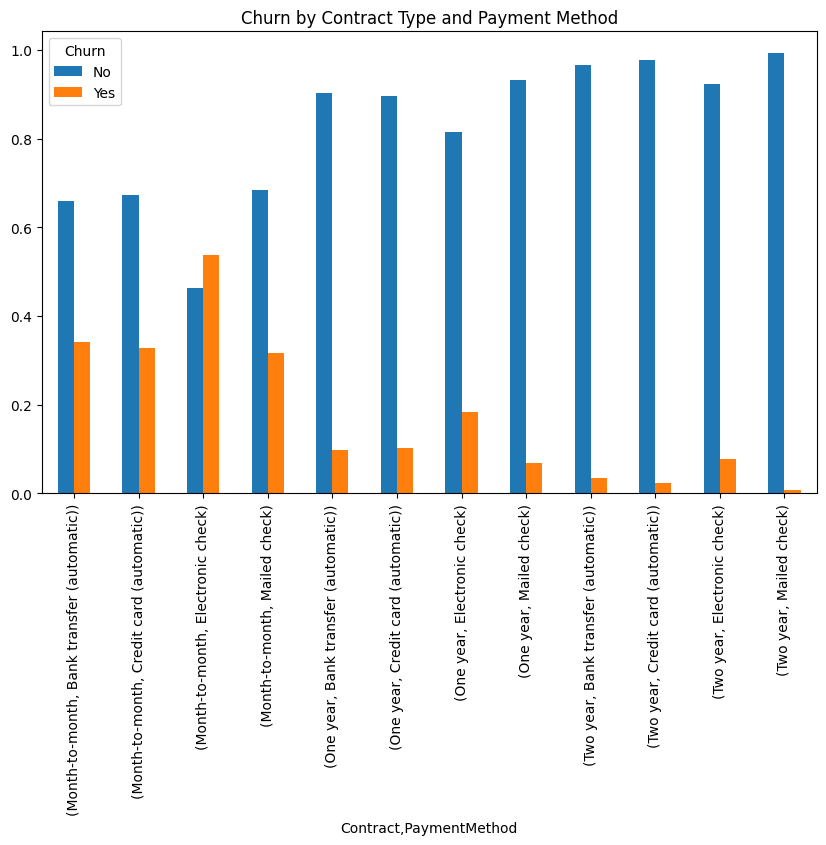

In [131]:
# Contract and PaymentMethod interaction with churn
pd.crosstab([data['Contract'], data['PaymentMethod']], data['Churn'], normalize='index').plot(kind='bar', figsize=(10, 6))
plt.title("Churn by Contract Type and Payment Method")
plt.show()


In [132]:
# Apply log transformation to reduce skewness
data['TotalCharges_log'] = np.log1p(data['TotalCharges'])  # log1p handles log(0) issues


In [133]:
# Create the interaction feature: Monthly Charges per Year of Tenure
# Add 1 to tenure to avoid division by zero for new customers with tenure = 0
data['MonthlyCostPerYear'] = data['MonthlyCharges'] / (data['tenure'].astype('float64')+1)


In [134]:
data['tenure']=data['tenure'].astype('float64')

In [135]:
# Binning tenure into categories
bins = list({0, 12, 24, 48, 72, data['tenure'].max()*12})
bins.sort()
labels = ['0-1 year', '1-2 years', '2-4 years', '4-6 years']
data['TenureBucket'] = pd.cut(data['tenure'], bins=bins, labels=labels, right=False)


In [136]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure,TotalCharges_log,MonthlyCostPerYear,TenureBucket
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,...,Month-to-month,Yes,Electronic check,29.85,29.85,No,0.08,3.429137,27.638889,0-1 year
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,...,One year,No,Mailed check,56.95,1889.50,No,2.83,7.544597,14.869452,0-1 year
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0.17,4.692723,46.025641,0-1 year
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,...,One year,No,Bank transfer (automatic),42.30,1840.75,No,3.75,7.518471,8.905263,0-1 year
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0.17,5.028148,60.427350,0-1 year
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,...,One year,Yes,Mailed check,84.80,1990.50,No,2.00,7.596643,28.266667,0-1 year
7039,2234-XADUH,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,...,One year,Yes,Credit card (automatic),103.20,7362.90,No,6.00,8.904345,14.742857,0-1 year
7040,4801-JZAZL,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0.92,5.850621,15.416667,0-1 year
7041,8361-LTMKD,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,...,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,0.33,5.728800,55.939850,0-1 year


In [137]:
# One-hot encoding contract type
data = pd.get_dummies(data, columns=['Contract'], drop_first=True)


In [138]:
# One-hot encoding payment method
data = pd.get_dummies(data, columns=['PaymentMethod'], drop_first=True)


In [139]:
# One-hot encoding internet service type
data = pd.get_dummies(data, columns=['InternetService'], drop_first=True)



In [140]:
# Aggregating service-related features into a single column
service_columns = ['PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Replace 'Yes' with 1, 'No' with 0
data[service_columns] = data[service_columns].replace({'Yes': 1, 'No': 0, 'No internet service': 0, 'No phone service': 0})

# Summing up the number of services the customer has subscribed to
data['TotalServices'] = data[service_columns].sum(axis=1)


/var/folders/xt/7k3j27k50rz15s_srwv63h9nq8y8f4/T/ipykernel_39537/3140638451.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[service_columns] = data[service_columns].replace({'Yes': 1, 'No': 0, 'No internet service': 0, 'No phone service': 0})


In [141]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCostPerYear,TenureBucket,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No,TotalServices
0,7590-VHVEG,Female,0,Yes,No,0,0,0,1,0,...,27.638889,0-1 year,False,False,False,True,False,False,False,1
1,5575-GNVDE,Male,0,No,No,1,0,1,0,1,...,14.869452,0-1 year,True,False,False,False,True,False,False,3
2,3668-QPYBK,Male,0,No,No,1,0,1,1,0,...,46.025641,0-1 year,False,False,False,False,True,False,False,3
3,7795-CFOCW,Male,0,No,No,0,0,1,0,1,...,8.905263,0-1 year,True,False,False,False,False,False,False,3
4,9237-HQITU,Female,0,No,No,1,0,0,0,0,...,60.427350,0-1 year,False,False,False,True,False,True,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,1,1,1,0,1,...,28.266667,0-1 year,True,False,False,False,True,False,False,7
7039,2234-XADUH,Female,0,Yes,Yes,1,1,0,1,1,...,14.742857,0-1 year,True,False,True,False,False,True,False,6
7040,4801-JZAZL,Female,0,Yes,Yes,0,0,1,0,0,...,15.416667,0-1 year,False,False,False,True,False,False,False,1
7041,8361-LTMKD,Male,1,Yes,No,1,1,0,0,0,...,55.939850,0-1 year,False,False,False,False,True,True,False,2


In [142]:
from sklearn.preprocessing import StandardScaler

# Scaling continuous features
scaler = StandardScaler()
data[['MonthlyCharges', 'TotalCharges_log', 'MonthlyCostPerYear']] = scaler.fit_transform(data[['MonthlyCharges', 'TotalCharges_log', 'MonthlyCostPerYear']])


In [143]:
# Dropping original columns that are no longer necessary
data = data.drop(columns=['TotalCharges', 'tenure', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 
                          'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'])


In [147]:
data = pd.get_dummies(data, columns=['TenureBucket'], drop_first=True)


In [148]:


# Apply one-hot encoding to the binned tenure column
data.columns


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PaperlessBilling', 'MonthlyCharges', 'Churn', 'TotalCharges_log',
       'MonthlyCostPerYear', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'InternetService_Fiber optic', 'InternetService_No', 'TotalServices',
       'TenureBucket_1-2 years', 'TenureBucket_2-4 years',
       'TenureBucket_4-6 years'],
      dtype='object')

In [149]:
real_dataset=data[['TotalCharges_log','MonthlyCostPerYear','Contract_One year',
       'Contract_Two year', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'InternetService_Fiber optic', 'InternetService_No','TotalServices','TenureBucket_1-2 years', 'TenureBucket_2-4 years',
       'TenureBucket_4-6 years','Churn']]

In [150]:
real_dataset

,TotalCharges_log,MonthlyCostPerYear,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No,TotalServices,TenureBucket_1-2 years,TenureBucket_2-4 years,TenureBucket_4-6 years,Churn
0,-2.232521,0.196442,False,False,False,True,False,False,False,1,False,False,False,No
1,0.390027,-0.505267,True,False,False,False,True,False,False,3,False,False,False,No
2,-1.427310,1.206836,False,False,False,False,True,False,False,3,False,False,False,Yes
3,0.373379,-0.833013,True,False,False,False,False,False,False,3,False,False,False,No
4,-1.213563,1.998242,False,False,False,True,False,True,False,1,False,False,False,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.423194,0.230940,True,False,False,False,True,False,False,7,False,False,False,No
7039,1.256517,-0.512224,True,False,True,False,False,True,False,6,False,False,False,No
7040,-0.689447,-0.475196,False,False,False,True,False,False,False,1,False,False,False,No
7041,-0.767077,1.751644,False,False,False,False,True,True,False,2,False,False,False,Yes


In [151]:
real_dataset=real_dataset.replace({
    False:0,
    True:1
})

/var/folders/xt/7k3j27k50rz15s_srwv63h9nq8y8f4/T/ipykernel_39537/2633216389.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  real_dataset=real_dataset.replace({


In [152]:
real_dataset

,TotalCharges_log,MonthlyCostPerYear,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No,TotalServices,TenureBucket_1-2 years,TenureBucket_2-4 years,TenureBucket_4-6 years,Churn
0,-2.232521,0.196442,0,0,0,1,0,0,0,1,0,0,0,No
1,0.390027,-0.505267,1,0,0,0,1,0,0,3,0,0,0,No
2,-1.427310,1.206836,0,0,0,0,1,0,0,3,0,0,0,Yes
3,0.373379,-0.833013,1,0,0,0,0,0,0,3,0,0,0,No
4,-1.213563,1.998242,0,0,0,1,0,1,0,1,0,0,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.423194,0.230940,1,0,0,0,1,0,0,7,0,0,0,No
7039,1.256517,-0.512224,1,0,1,0,0,1,0,6,0,0,0,No
7040,-0.689447,-0.475196,0,0,0,1,0,0,0,1,0,0,0,No
7041,-0.767077,1.751644,0,0,0,0,1,1,0,2,0,0,0,Yes


In [153]:
from sklearn.preprocessing import LabelEncoder

In [154]:
encoder=LabelEncoder()
real_dataset['Churn']=encoder.fit_transform(real_dataset['Churn'])

In [155]:
real_dataset

,TotalCharges_log,MonthlyCostPerYear,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No,TotalServices,TenureBucket_1-2 years,TenureBucket_2-4 years,TenureBucket_4-6 years,Churn
0,-2.232521,0.196442,0,0,0,1,0,0,0,1,0,0,0,0
1,0.390027,-0.505267,1,0,0,0,1,0,0,3,0,0,0,0
2,-1.427310,1.206836,0,0,0,0,1,0,0,3,0,0,0,1
3,0.373379,-0.833013,1,0,0,0,0,0,0,3,0,0,0,0
4,-1.213563,1.998242,0,0,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.423194,0.230940,1,0,0,0,1,0,0,7,0,0,0,0
7039,1.256517,-0.512224,1,0,1,0,0,1,0,6,0,0,0,0
7040,-0.689447,-0.475196,0,0,0,1,0,0,0,1,0,0,0,0
7041,-0.767077,1.751644,0,0,0,0,1,1,0,2,0,0,0,1


In [156]:
from sklearn.model_selection import train_test_split

# Assuming 'Churn' is the target variable
X = real_dataset.drop(columns=['Churn'])
y = real_dataset['Churn']

# 80-20 split for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [157]:
from sklearn.linear_model import LogisticRegression

# Instantiate and train the model
logreg = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [158]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the model
log_reg = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = log_reg.predict(X_test)
y_pred_proba_lr = log_reg.predict_proba(X_test)[:, 1]  # Get probabilities for ROC-AUC


In [159]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
rf_model = RandomForestClassifier(class_weight='balanced', n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]


In [160]:
from xgboost import XGBClassifier

# Initialize and train the model
xgb_model = XGBClassifier(scale_pos_weight=(len(y_train) / sum(y_train == 1)), n_estimators=200, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]


In [161]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

def evaluate_model(y_true, y_pred, y_pred_proba):
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("AUC-ROC:", roc_auc_score(y_true, y_pred_proba))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))


In [162]:
# Evaluate Logistic Regression
print("Logistic Regression:")
evaluate_model(y_test, y_pred_lr, y_pred_proba_lr)

# Evaluate Random Forest
print("\nRandom Forest:")
evaluate_model(y_test, y_pred_rf, y_pred_proba_rf)

# Evaluate XGBoost
print("\nXGBoost:")
evaluate_model(y_test, y_pred_xgb, y_pred_proba_xgb)


Logistic Regression:
Accuracy: 0.7388218594748048
Precision: 0.5051724137931034
Recall: 0.7834224598930482
F1 Score: 0.6142557651991615
AUC-ROC: 0.8408974657056498
Confusion Matrix:
 [[748 287]
 [ 81 293]]

Random Forest:
Accuracy: 0.7650816181689141
Precision: 0.56656346749226
Recall: 0.4893048128342246
F1 Score: 0.5251076040172167
AUC-ROC: 0.7936332635821127
Confusion Matrix:
 [[895 140]
 [191 183]]

XGBoost:
Accuracy: 0.7395315826827538
Precision: 0.5067961165048543
Recall: 0.6978609625668449
F1 Score: 0.5871766029246345
AUC-ROC: 0.8093918726911055
Confusion Matrix:
 [[781 254]
 [113 261]]


In [163]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Best parameters
print("Best parameters for Random Forest:", grid_search_rf.best_params_)

# Evaluate the best model
best_rf_model = grid_search_rf.best_estimator_
y_pred_rf_best = best_rf_model.predict(X_test)
y_pred_proba_rf_best = best_rf_model.predict_proba(X_test)[:, 1]

# Evaluate tuned Random Forest
print("\nTuned Random Forest:")
evaluate_model(y_test, y_pred_rf_best, y_pred_proba_rf_best)


Best parameters for Random Forest: {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 100}

Tuned Random Forest:
Accuracy: 0.7388218594748048
Precision: 0.5050847457627119
Recall: 0.7967914438502673
F1 Score: 0.6182572614107884
AUC-ROC: 0.8387015939445608
Confusion Matrix:
 [[743 292]
 [ 76 298]]


In [164]:
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Initialize GridSearchCV
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search_xgb.fit(X_train, y_train)

# Best parameters
print("Best parameters for XGBoost:", grid_search_xgb.best_params_)

# Evaluate the best model
best_xgb_model = grid_search_xgb.best_estimator_
y_pred_xgb_best = best_xgb_model.predict(X_test)
y_pred_proba_xgb_best = best_xgb_model.predict_proba(X_test)[:, 1]

# Evaluate tuned XGBoost
print("\nTuned XGBoost:")
evaluate_model(y_test, y_pred_xgb_best, y_pred_proba_xgb_best)


Best parameters for XGBoost: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}

Tuned XGBoost:
Accuracy: 0.7004968062455642
Precision: 0.4652173913043478
Recall: 0.8582887700534759
F1 Score: 0.6033834586466166
AUC-ROC: 0.8395476504172157
Confusion Matrix:
 [[666 369]
 [ 53 321]]


In [165]:

import joblib
joblib.dump(xgb_model, '/Users/sai.thota/Projects/Customer_Churn_Prediction/models/final_xgboost_churn_model.pkl')


['/Users/sai.thota/Projects/Customer_Churn_Prediction/models/final_xgboost_churn_model.pkl']

In [166]:
real_dataset.columns

Index(['TotalCharges_log', 'MonthlyCostPerYear', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'InternetService_Fiber optic', 'InternetService_No', 'TotalServices',
       'TenureBucket_1-2 years', 'TenureBucket_2-4 years',
       'TenureBucket_4-6 years', 'Churn'],
      dtype='object')